## **PROBLEM STATEMENT**

The price of a car depends on a lot of factors like the goodwill of the brand of the car,
features of the car, horsepower and the mileage it gives and many more. Car price
prediction is one of the major research areas in machine learning.

## **IMPORTING LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd

## **READING DATASETS**

In [ ]:
df=pd.read_csv("car_price.csv")
df.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df.tail(5)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


## **EXPLORATORY DATA ANALYSIS**

In [ ]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [ ]:
df.describe()


,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
df.shape

(301, 9)

In [ ]:
df.count()

Car_Name         301
Year             301
Selling_Price    301
Present_Price    301
Driven_kms       301
Fuel_Type        301
Selling_type     301
Transmission     301
Owner            301
dtype: int64

## **HANDLING MISSING VALUES**

In [ ]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

## **IMPORTING LIBRARIES FOR VISUALIZATION**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# ***PAIRPLOT***

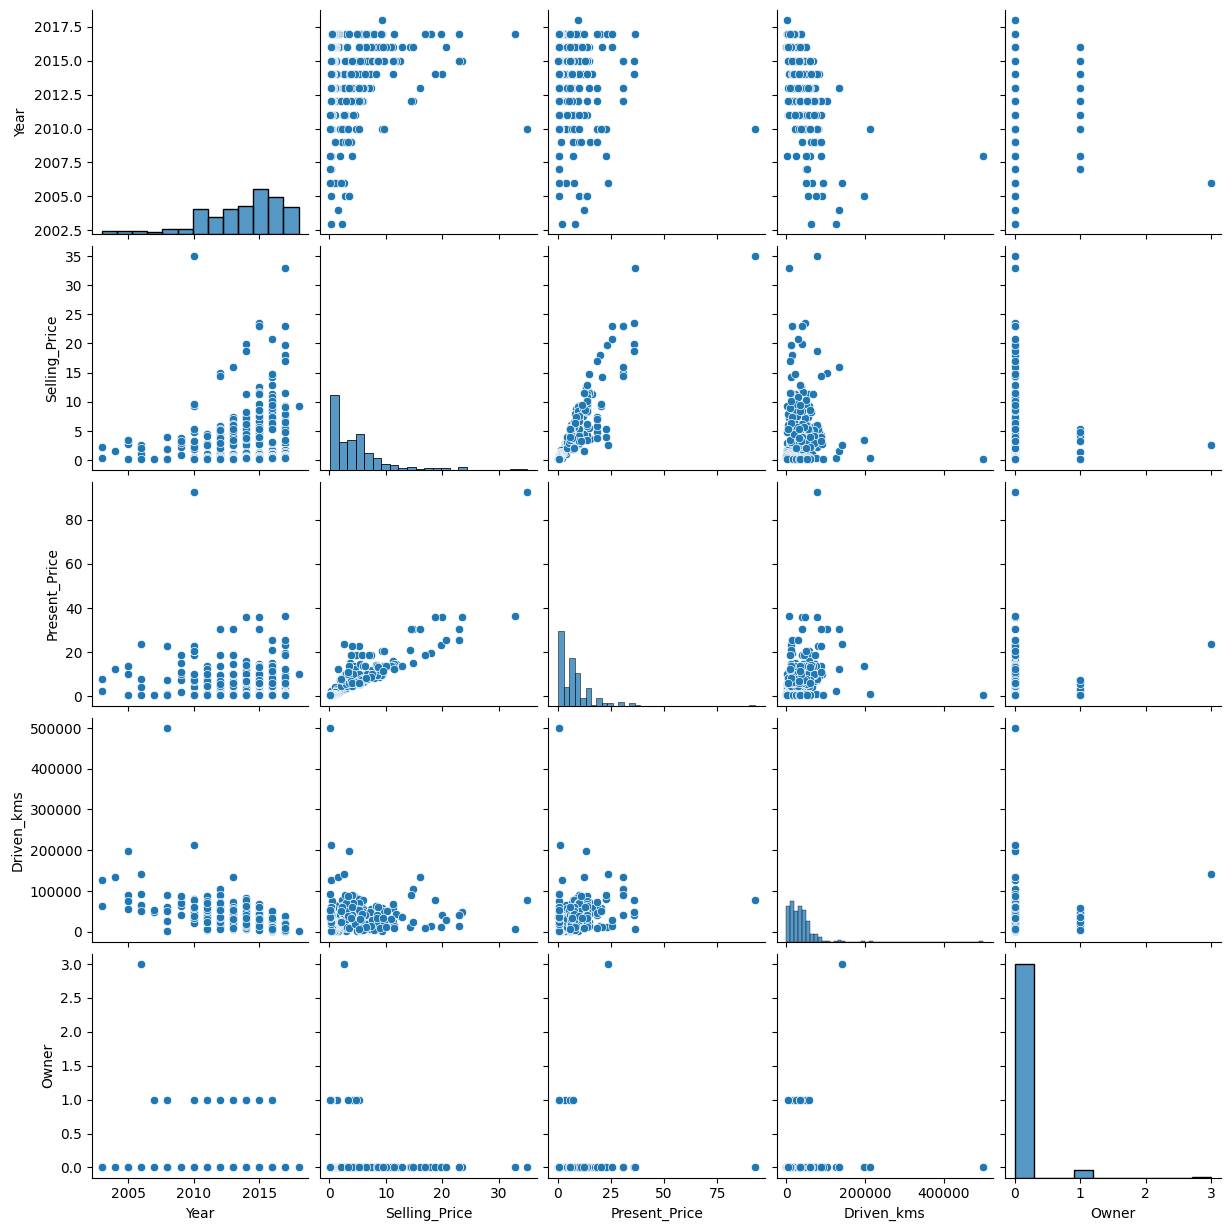

In [ ]:
sns.pairplot(df, height=2.5)
plt.show()

# ***CORRELATION MATRIX***

<ipython-input-15-54cf404447d6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


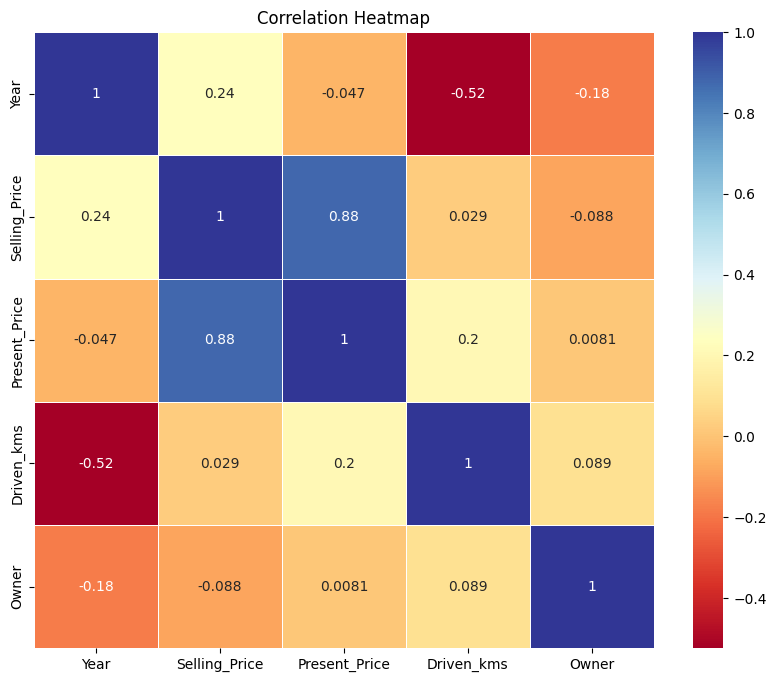

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu', linewidths=0.4)
plt.title('Correlation Heatmap')
plt.show()

# ***SCATTERPLOT***

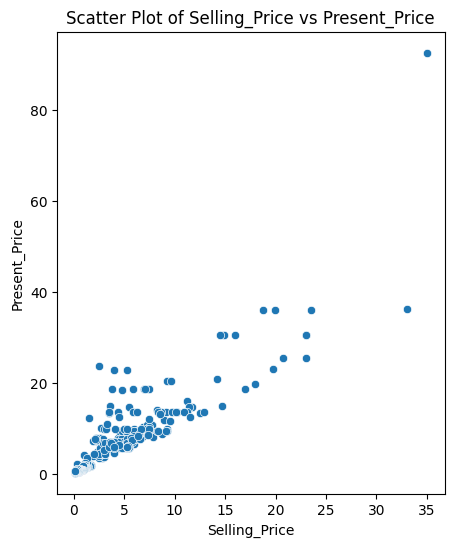

In [ ]:
plt.figure(figsize=(5, 6))
sns.scatterplot(x='Selling_Price', y='Present_Price', data=df)
plt.title('Scatter Plot of Selling_Price vs Present_Price')
plt.show()

# ***BOXPLOT***

<Axes: xlabel='Selling_Price', ylabel='Present_Price'>

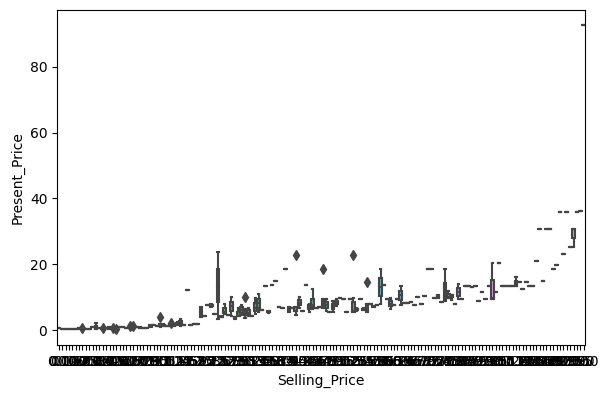

In [ ]:
plt.figure(figsize=(15, 20))
plt.subplot(4,2,2)
sns.boxplot(x = 'Selling_Price', y = 'Present_Price', data = df)

<Axes: xlabel='Car_Name', ylabel='Year'>

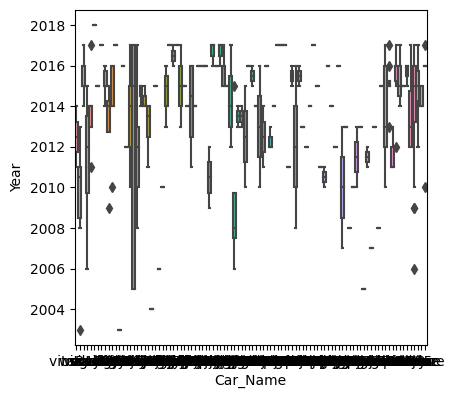

In [ ]:
plt.figure(figsize=(10, 20))
plt.subplot(4,2,2)
sns.boxplot(x = 'Car_Name', y = 'Year', data = df)

In [ ]:
from sklearn.model_selection import train_test_split

***ENCODING***

In [ ]:
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

df.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)

df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)


In [ ]:
X = df.drop(['Car_Name','Selling_Price'],axis=1)
Y = df['Selling_Price']

In [ ]:
print(X)

     Year  Present_Price  Driven_kms  Fuel_Type  Selling_type  Transmission  \
0    2014           5.59       27000          0             0             0   
1    2013           9.54       43000          1             0             0   
2    2017           9.85        6900          0             0             0   
3    2011           4.15        5200          0             0             0   
4    2014           6.87       42450          1             0             0   
..    ...            ...         ...        ...           ...           ...   
296  2016          11.60       33988          1             0             0   
297  2015           5.90       60000          0             0             0   
298  2009          11.00       87934          0             0             0   
299  2017          12.50        9000          1             0             0   
300  2016           5.90        5464          0             0             0   

     Owner  
0        0  
1        0  
2        0  

In [ ]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


## **SPLITTING ,TRAINING AND TESTING THE DATA**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

## **ML ALGORITHM**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train,Y_train)

LinearRegression()

## **MODEL PREDICITION**

In [ ]:
predic = model.predict(X_train)


## **R SQUARED ERROR**

In [ ]:
error_score = metrics.r2_score(Y_train, predic)
print("R squared Error : ", error_score)

R squared Error :  0.8796483009370215
